In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit #for data preprocessing and crass validating 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression #logistic Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest 

from statistics import mean
from hyperopt import Trials, hp, fmin, tpe, STATUS_OK, space_eval #for hyperparameter tuning and minimizing

from cyclic_boosting.pipelines import pipeline_CBClassifier
from sklearn.ensemble import HistGradientBoostingRegressor

from datetime import date
from datetime import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

import pmdarima as pm 

In [2]:
samples = pd.read_csv('preprocessed_lstm.csv')
samples['date'] = pd.to_datetime(samples['date'])
samples = samples.drop(columns=['Unnamed: 0'], axis = 1)
reading_types = pd.read_csv('reading_types.csv')
value_type_ids = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124278 entries, 0 to 124277
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           124278 non-null  datetime64[ns]
 1   building_id    124278 non-null  int64         
 2   1              124278 non-null  float64       
 3   2              124278 non-null  float64       
 4   3              124278 non-null  float64       
 5   4              124278 non-null  float64       
 6   5              124278 non-null  float64       
 7   6              124278 non-null  float64       
 8   7              124278 non-null  float64       
 9   8              124278 non-null  float64       
 10  9              124278 non-null  float64       
 11  10             124278 non-null  float64       
 12  11             124278 non-null  float64       
 13  12             124278 non-null  float64       
 14  day type       124278 non-null  int64         
 15  

1 ================================================================================
CO2 --------------------------------------------------------------------------------
Test statistic:  -12.493784271487288
p-value:  2.906309422618924e-23
Critical Values: {'1%': -3.43123292172627, '5%': -2.8619301838570053, '10%': -2.5669776905295567}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=74216.796, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=67617.164, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=69927.997, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=113818.261, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=67608.658, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=67602.829, Time=0.57 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=67595.725, Time=0.70 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=67597.357, Time=0.87 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=67597.731, Time=4.10 sec
 ARIMA(3,0,1)(0,0,

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


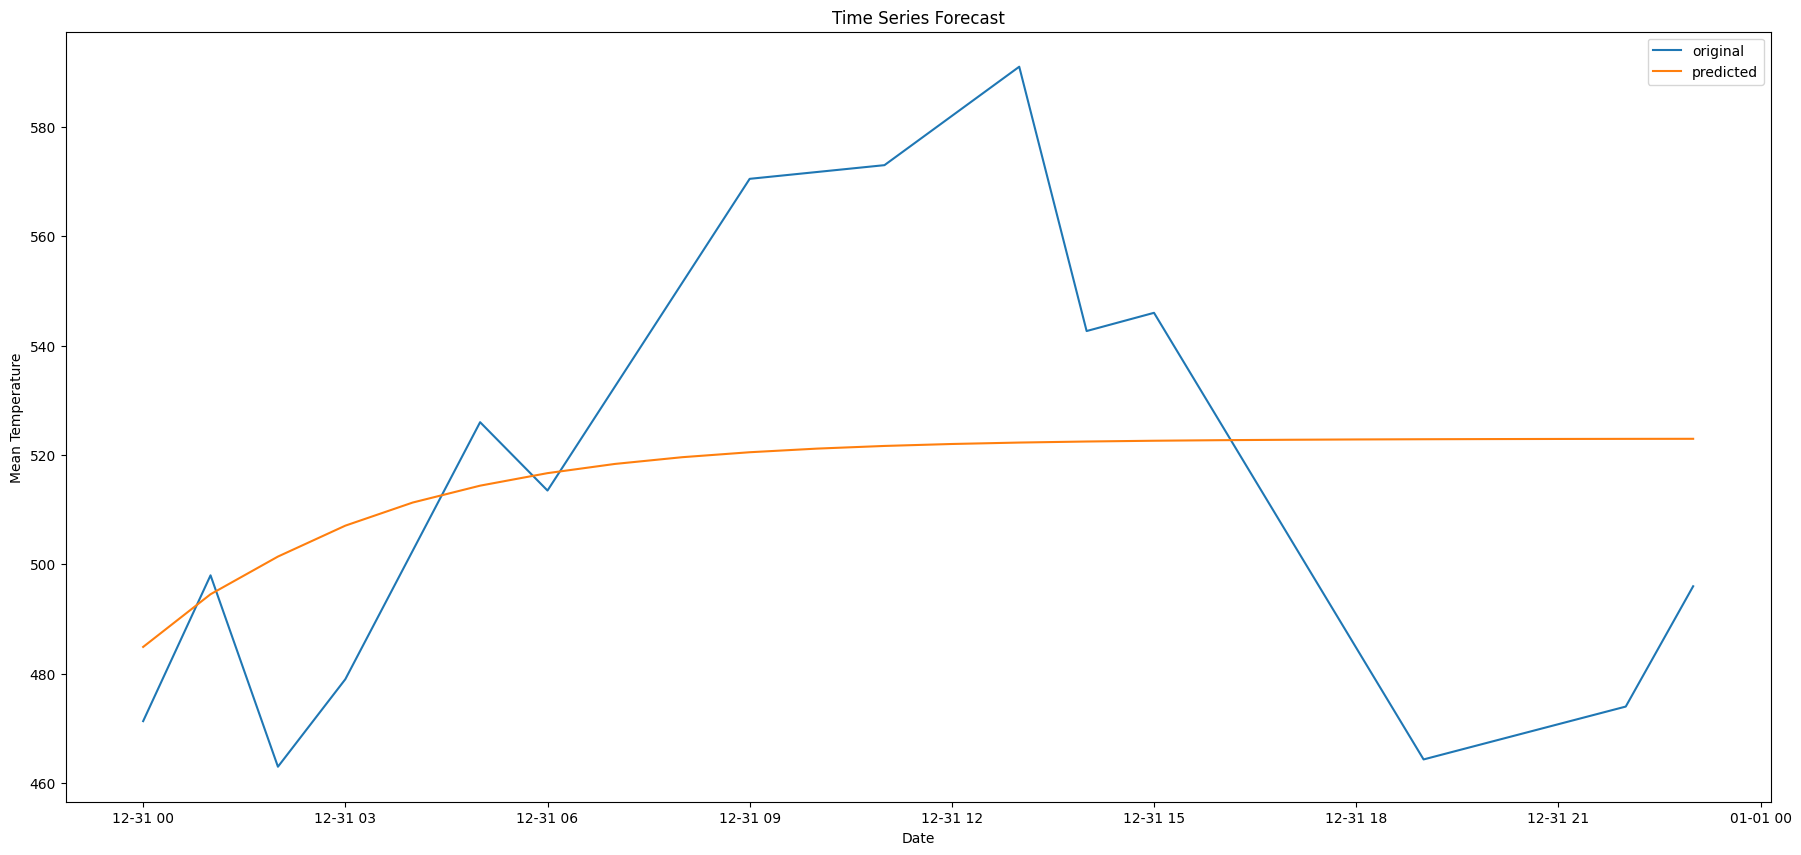

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast


MEAN SQUARED ERROR:  1457.3920136063734
CO --------------------------------------------------------------------------------
Test statistic:  -5.894500546066236
p-value:  2.8725795156458417e-07
Critical Values: {'1%': -3.431234234988236, '5%': -2.8619307641319858, '10%': -2.5669779994183854}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-212.530, Time=0.67 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10204.997, Time=0.91 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5474.796, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18128.606, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-10238.261, Time=1.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-10296.752, Time=1.43 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-10312.229, Time=1.85 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-10311.673, Time=2.19 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-10308.751, Time=8.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-10310.144, Tim

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


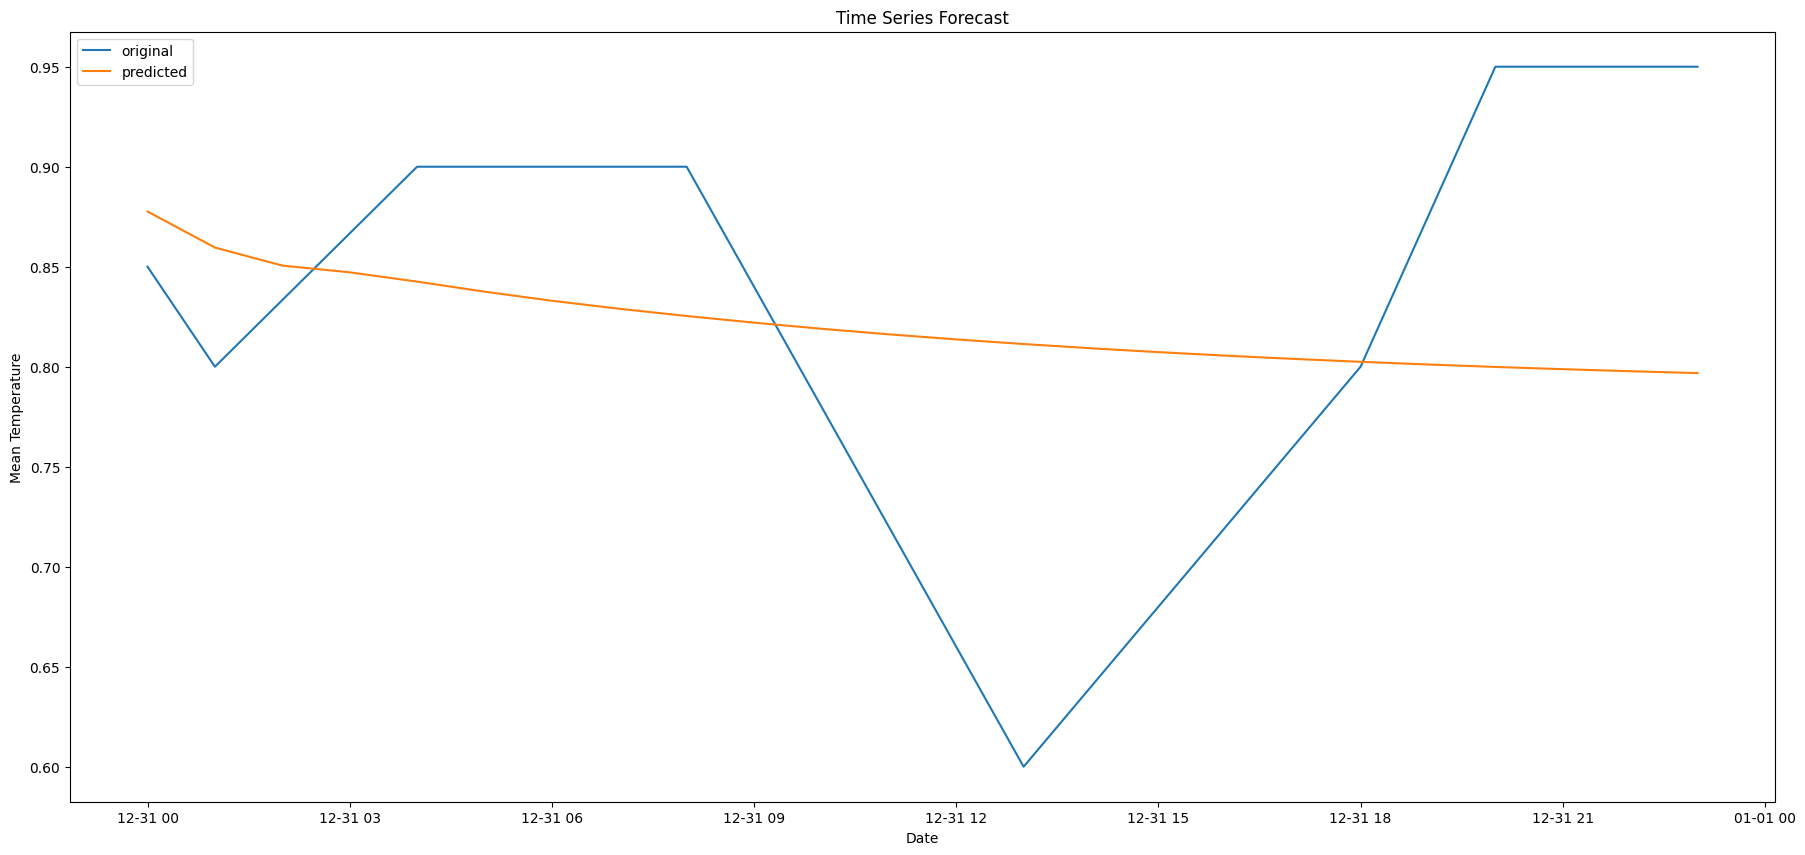

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast


MEAN SQUARED ERROR:  0.010761269718811603
TVOC --------------------------------------------------------------------------------
Test statistic:  -13.629016185648489
p-value:  1.737733830553666e-25
Critical Values: {'1%': -3.43123399592283, '5%': -2.861930658499102, '10%': -2.5669779431884585}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=94007.003, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=85783.351, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=88879.867, Time=1.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=99457.323, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=85608.558, Time=0.31 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=85604.807, Time=0.50 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=85604.799, Time=0.59 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=85598.908, Time=0.74 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=85587.880, Time=0.88 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=85569.983, Time=1.

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


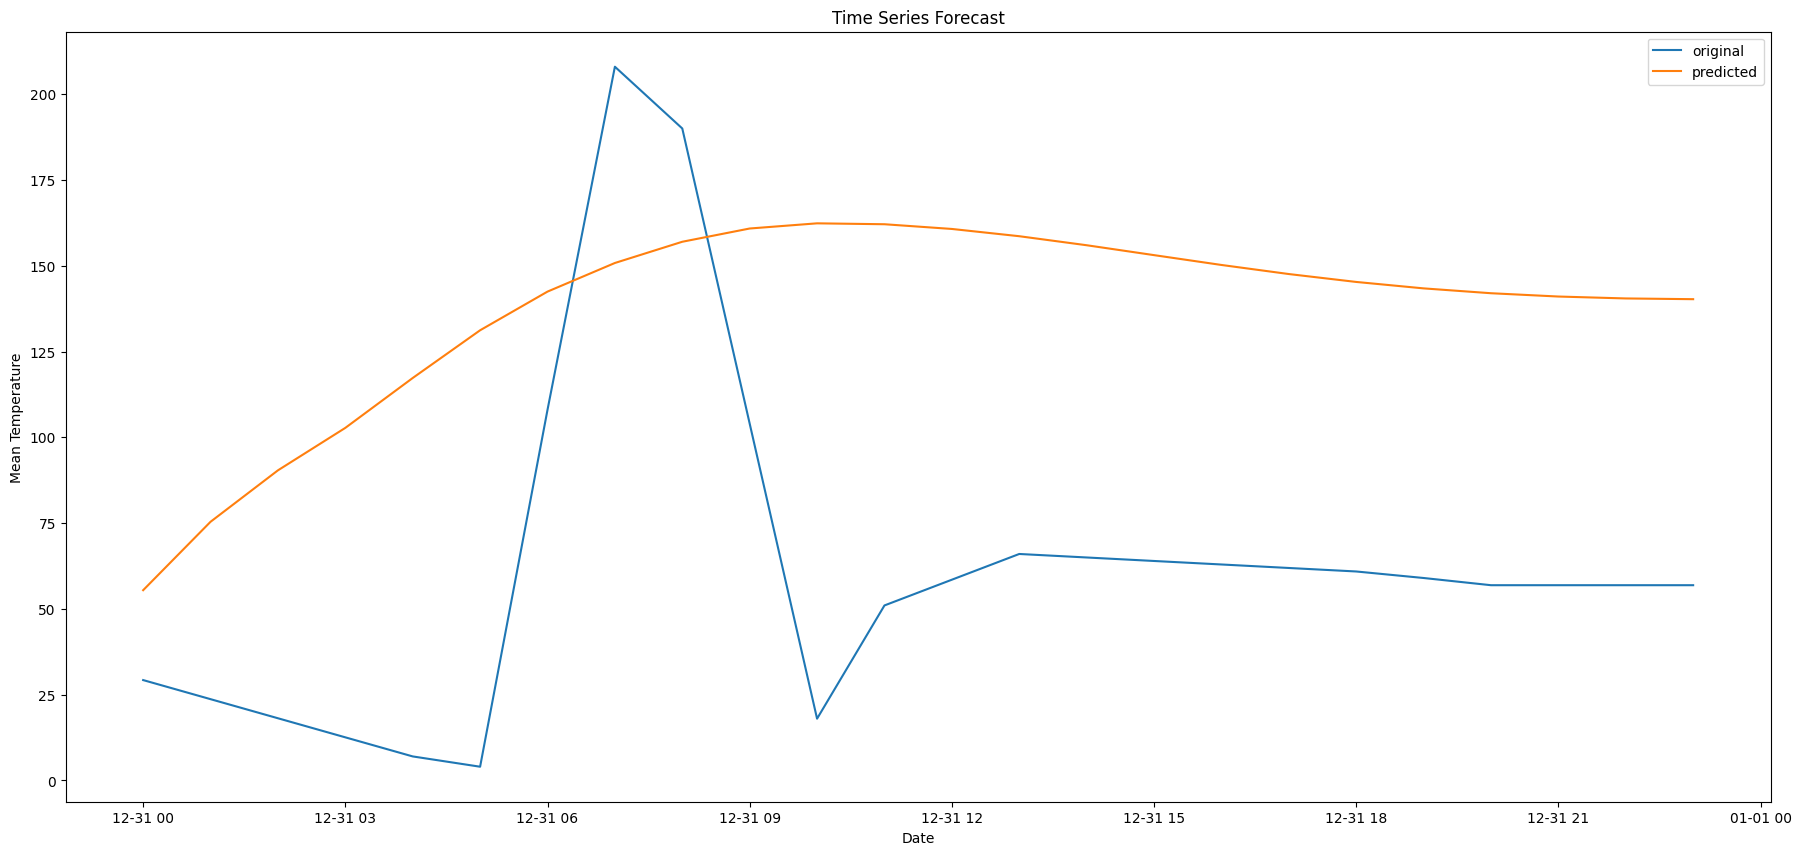

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


MEAN SQUARED ERROR:  7488.157477031607
PM10 --------------------------------------------------------------------------------
CONSATANT FOR:  PM10
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-156979.698, Time=0.43 sec
Total fit time: 0.433 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7409
Model:                        SARIMAX   Log Likelihood               78490.849
Date:                Fri, 16 Feb 2024   AIC                        -156979.698
Time:                        17:39:26   BIC                        -156972.788
Sample:                             0   HQIC                       -156977.324
                               - 7409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


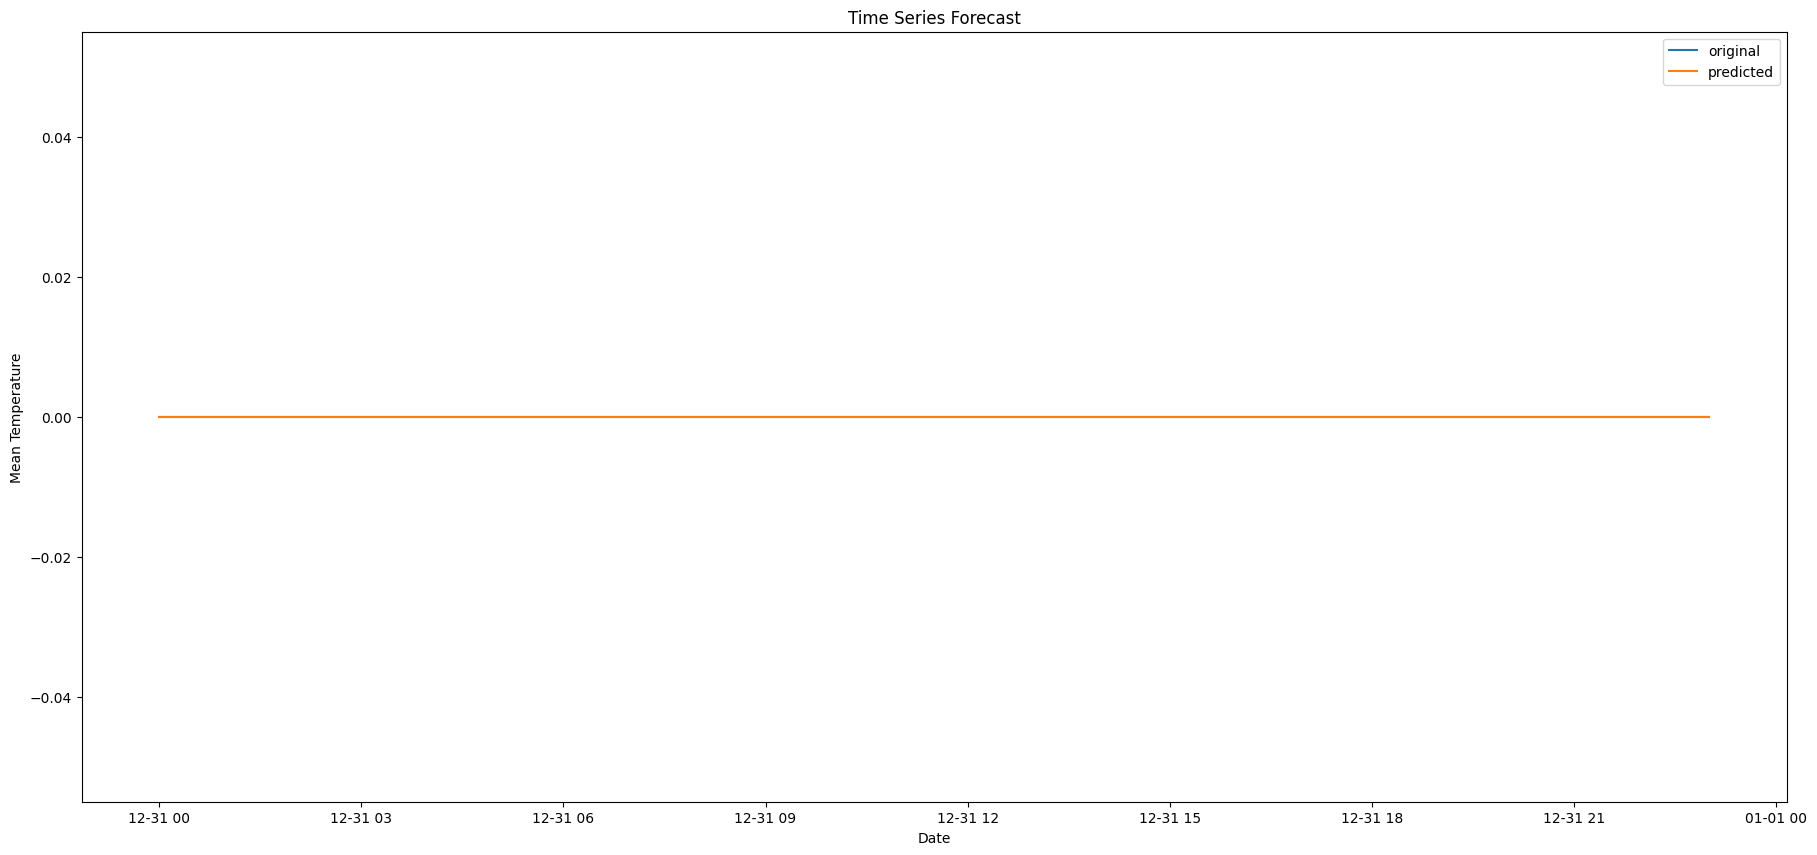

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


MEAN SQUARED ERROR:  0.0
PM25 --------------------------------------------------------------------------------
CONSATANT FOR:  PM25
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-156979.698, Time=0.45 sec
Total fit time: 0.448 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7409
Model:                        SARIMAX   Log Likelihood               78490.849
Date:                Fri, 16 Feb 2024   AIC                        -156979.698
Time:                        17:39:27   BIC                        -156972.788
Sample:                             0   HQIC                       -156977.324
                               - 7409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


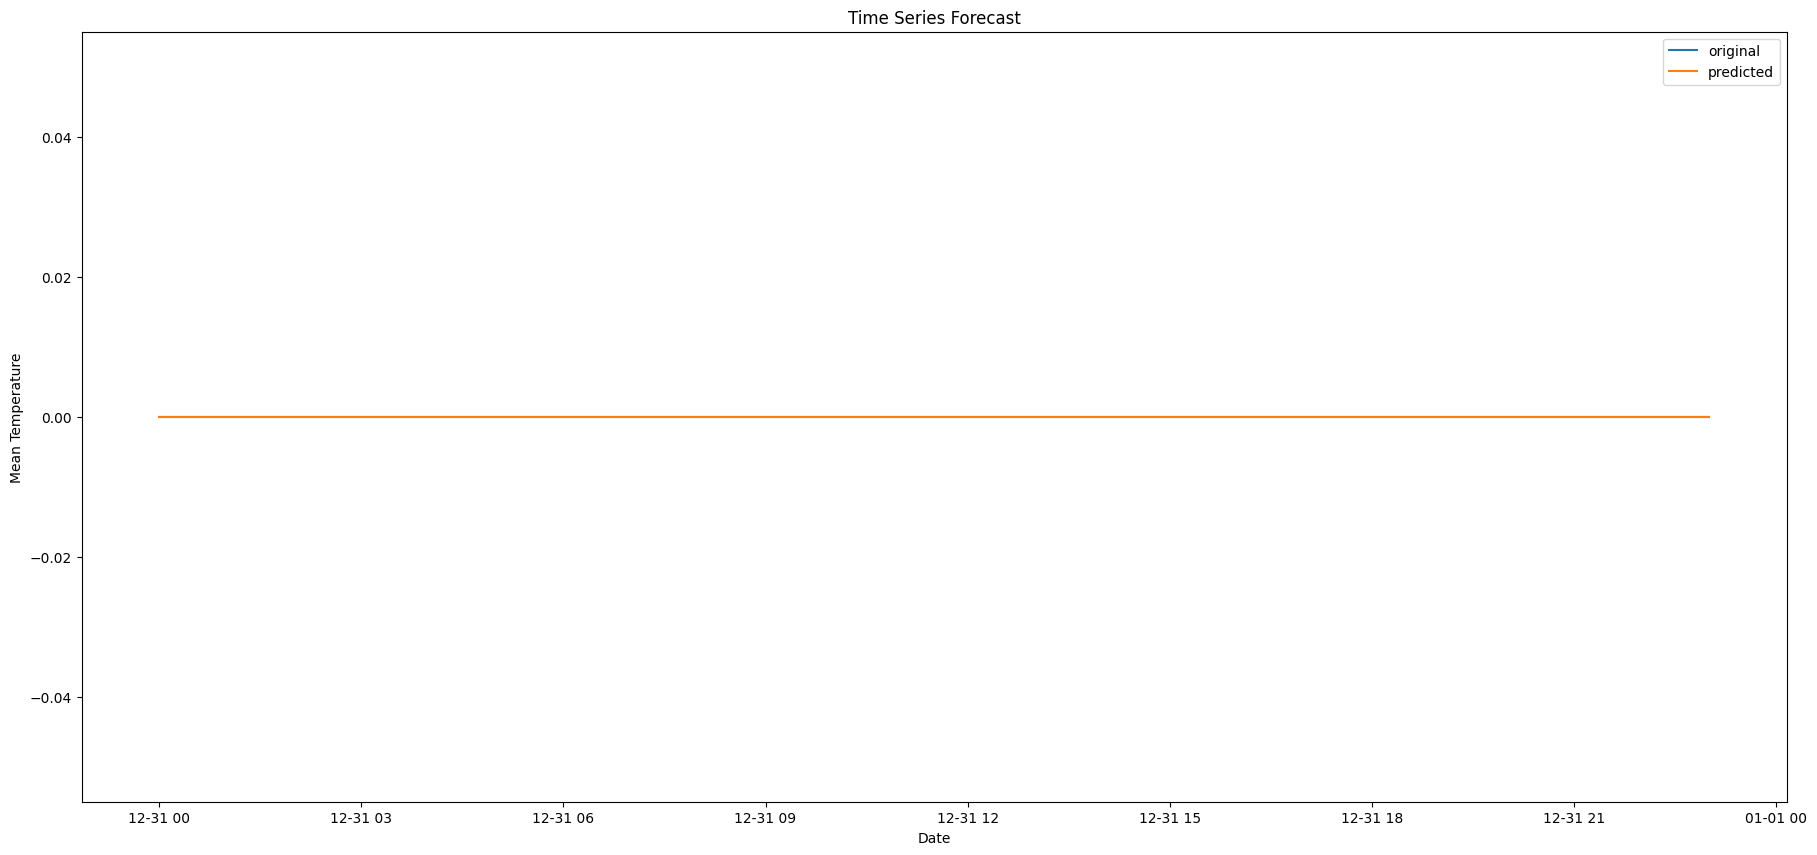

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


MEAN SQUARED ERROR:  0.0
PM01 --------------------------------------------------------------------------------
CONSATANT FOR:  PM01
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-156979.698, Time=0.41 sec
Total fit time: 0.407 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7409
Model:                        SARIMAX   Log Likelihood               78490.849
Date:                Fri, 16 Feb 2024   AIC                        -156979.698
Time:                        17:39:28   BIC                        -156972.788
Sample:                             0   HQIC                       -156977.324
                               - 7409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


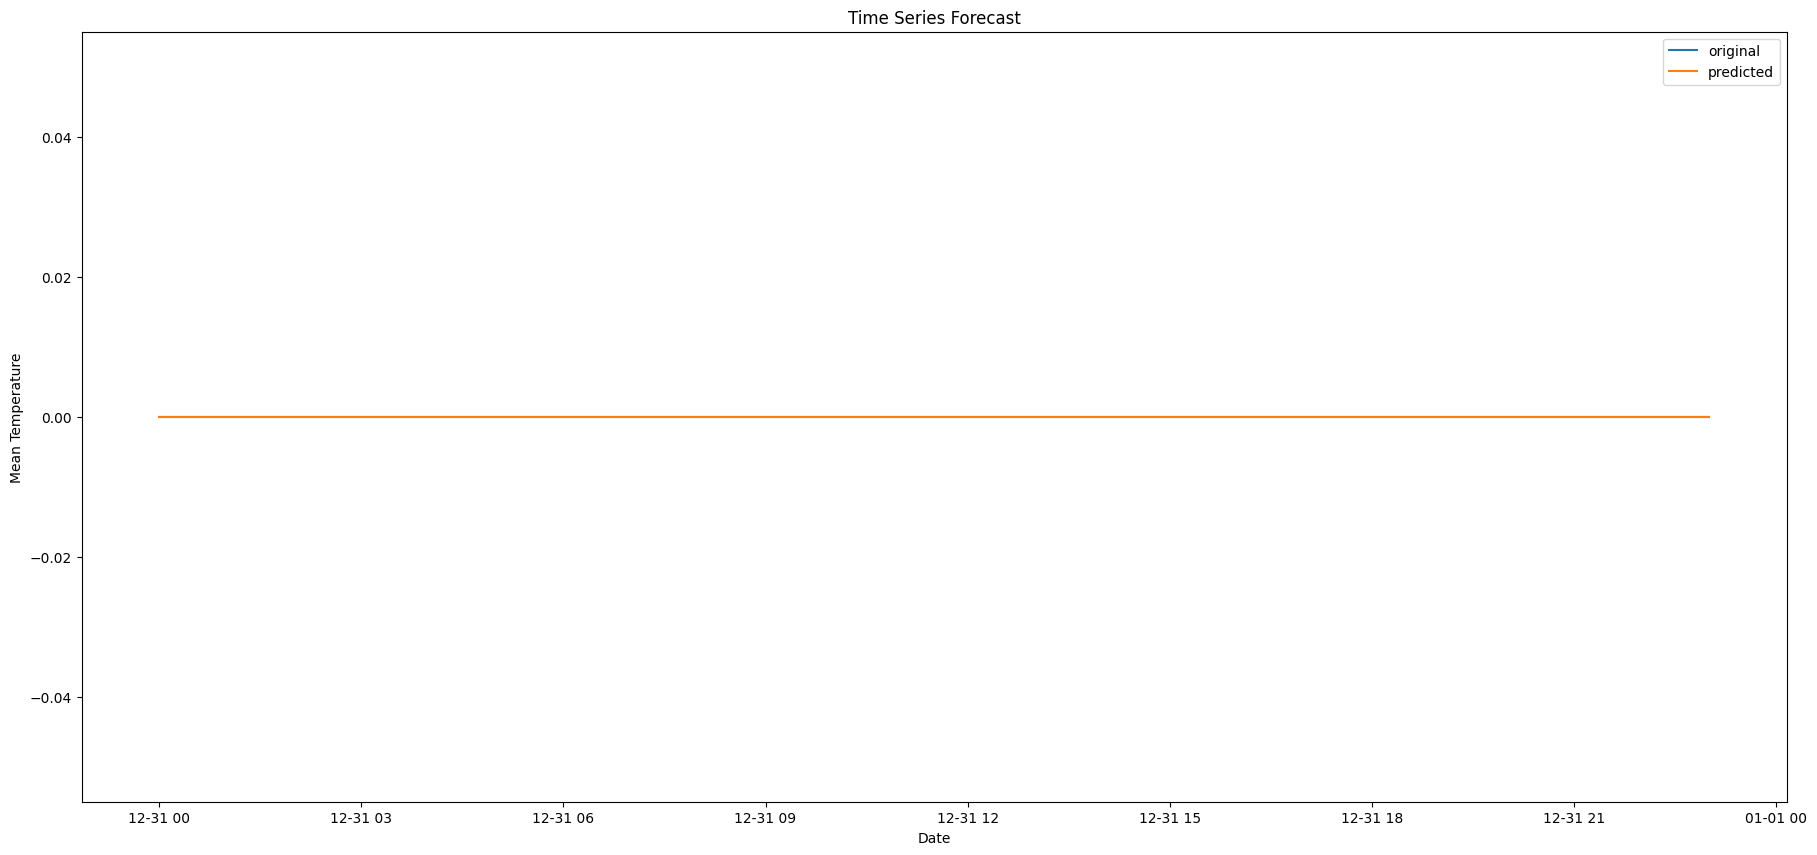

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast


MEAN SQUARED ERROR:  0.0
HCHO --------------------------------------------------------------------------------
Test statistic:  -10.878710076404221
p-value:  1.3114236424222958e-19
Critical Values: {'1%': -3.43123399592283, '5%': -2.861930658499102, '10%': -2.5669779431884585}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=38652.711, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29620.075, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=33371.224, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63126.767, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=29547.925, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=29548.363, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=29504.337, Time=5.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=29550.655, Time=0.94 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=29501.478, Time=6.76 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29480.727, Time=7.60 sec
 ARIMA(4,

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


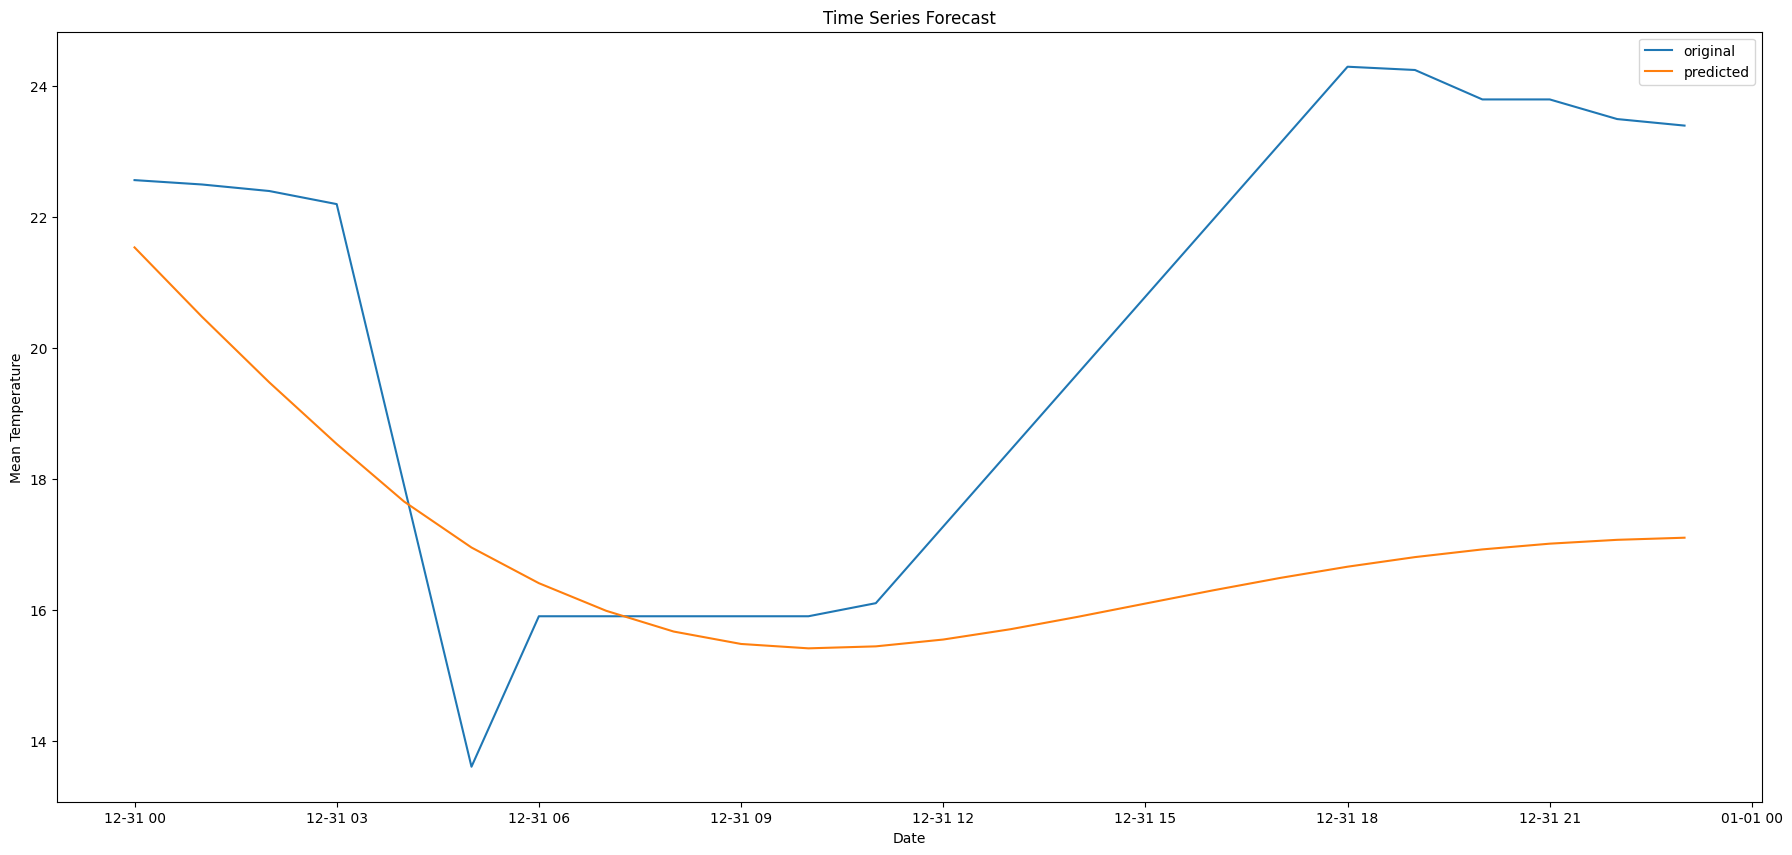

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast


MEAN SQUARED ERROR:  18.76947996521002
NO2 --------------------------------------------------------------------------------
Test statistic:  -10.404942376190286
p-value:  1.8673582129848426e-18
Critical Values: {'1%': -3.43123292172627, '5%': -2.8619301838570053, '10%': -2.5669776905295567}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=38538.025, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=31725.805, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=34229.269, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=69794.853, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=31719.209, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=31721.203, Time=0.91 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=31721.210, Time=1.88 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=31719.155, Time=2.35 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31721.060, Time=3.84 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=32857.276, Time=1.05

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


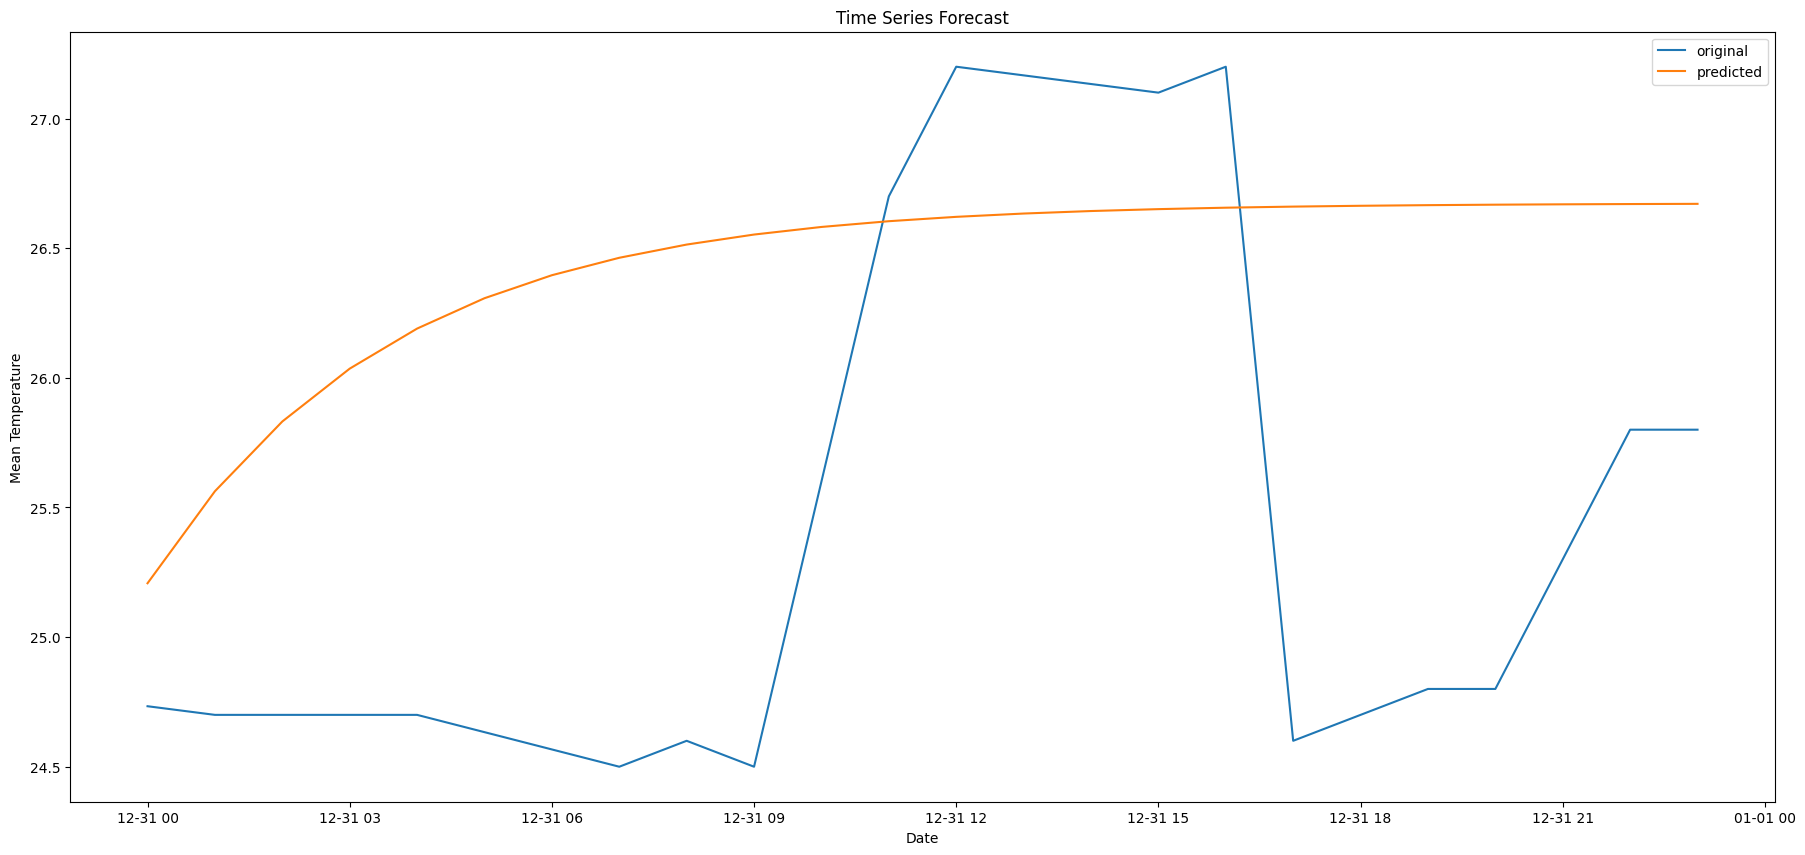

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast


MEAN SQUARED ERROR:  1.8718555354895734
O3 --------------------------------------------------------------------------------
Test statistic:  -10.600273670817865
p-value:  6.196876545808303e-19
Critical Values: {'1%': -3.431233040952505, '5%': -2.8619302365380523, '10%': -2.566977718572444}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-15098.302, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-20398.128, Time=0.86 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-18499.371, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65362.741, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-20420.751, Time=1.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-20443.743, Time=1.58 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-20445.393, Time=2.22 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-20444.152, Time=2.65 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-20416.051, Time=4.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-20402.148, T

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


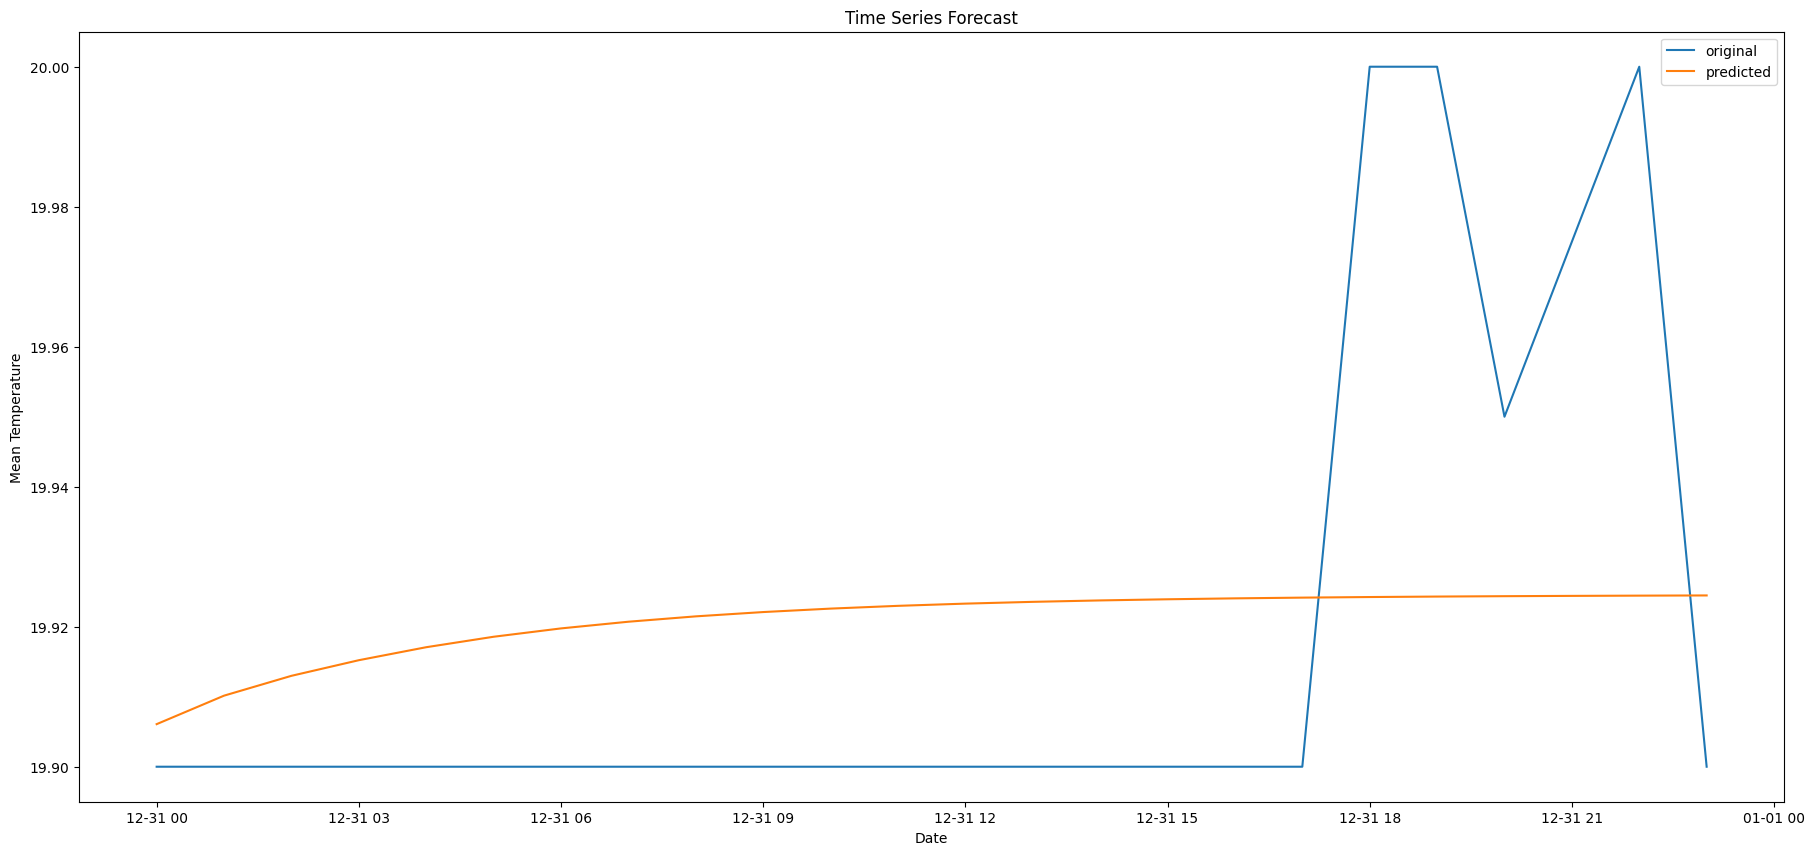

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast


MEAN SQUARED ERROR:  0.001182245076179849
NH3 --------------------------------------------------------------------------------
Test statistic:  -7.163082002995622
p-value:  2.9335338047180814e-10
Critical Values: {'1%': -3.431233040952505, '5%': -2.8619302365380523, '10%': -2.566977718572444}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29099.104, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21569.105, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24757.971, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65787.832, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=21545.533, Time=0.45 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=21531.856, Time=0.58 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=21518.733, Time=1.15 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=21509.270, Time=3.18 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=21507.219, Time=4.52 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=21496.401, Time=2.

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


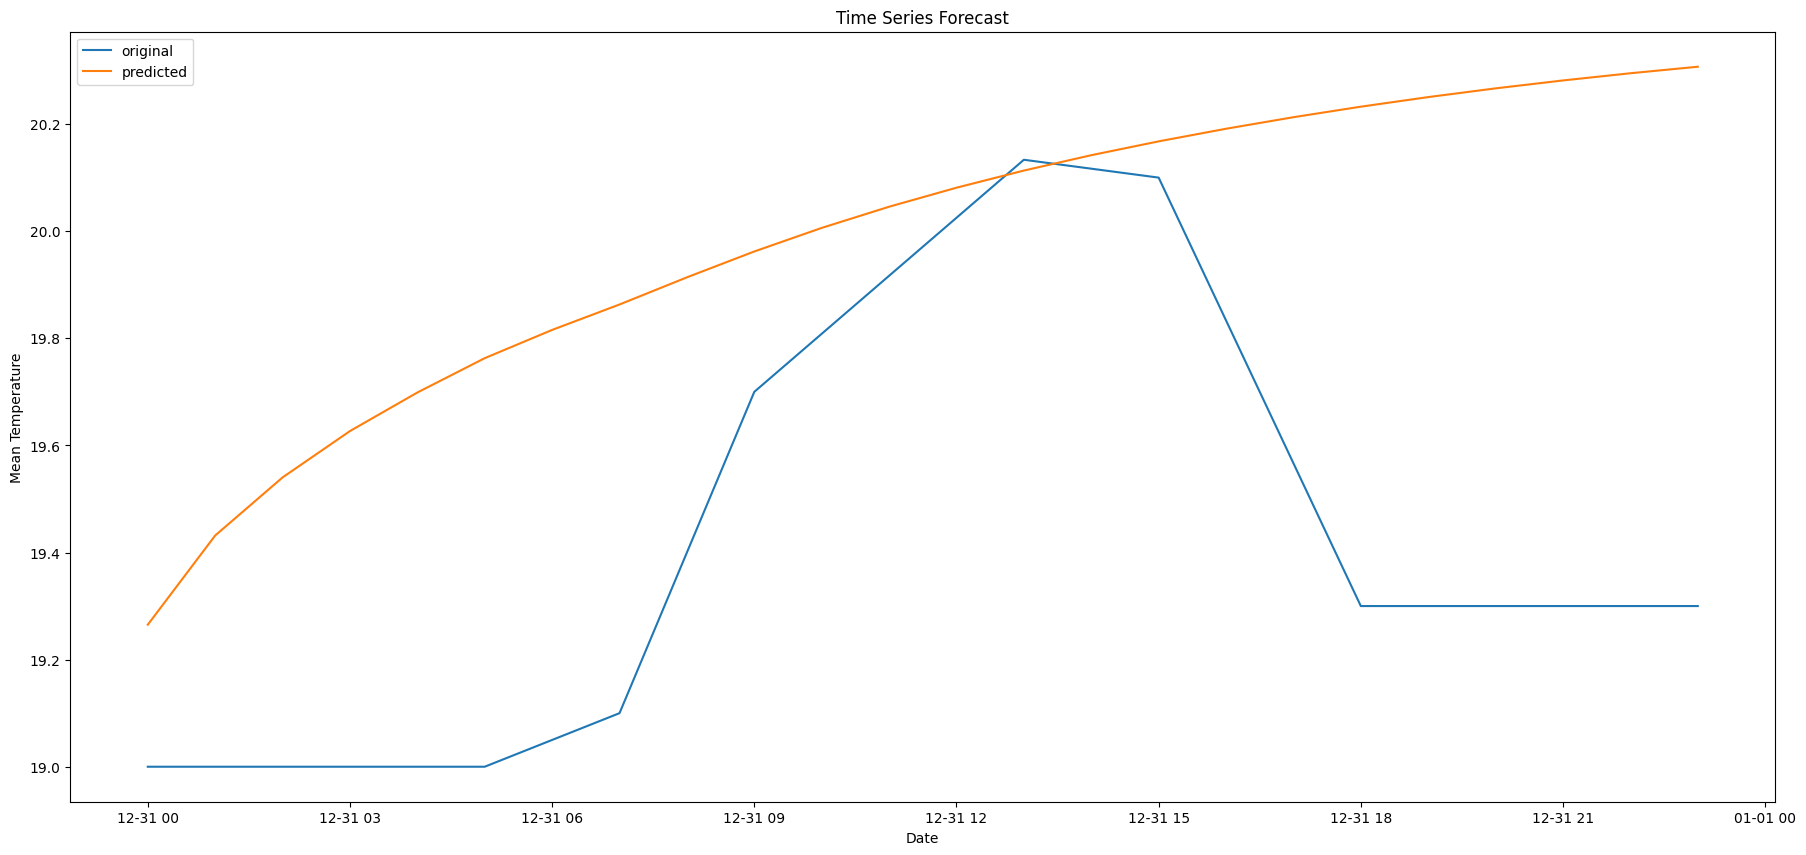

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast


MEAN SQUARED ERROR:  0.4081989187543056
Temp --------------------------------------------------------------------------------
Test statistic:  -9.023992579876214
p-value:  5.6749205830509955e-15
Critical Values: {'1%': -3.431233398824488, '5%': -2.861930394666581, '10%': -2.5669778027465613}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=34607.021, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20898.074, Time=0.69 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=27745.868, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67981.196, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=20640.790, Time=0.81 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=20632.987, Time=1.57 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=20622.037, Time=2.14 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=20615.336, Time=2.13 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=20605.313, Time=2.55 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=20599.450, Time=3.5

c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


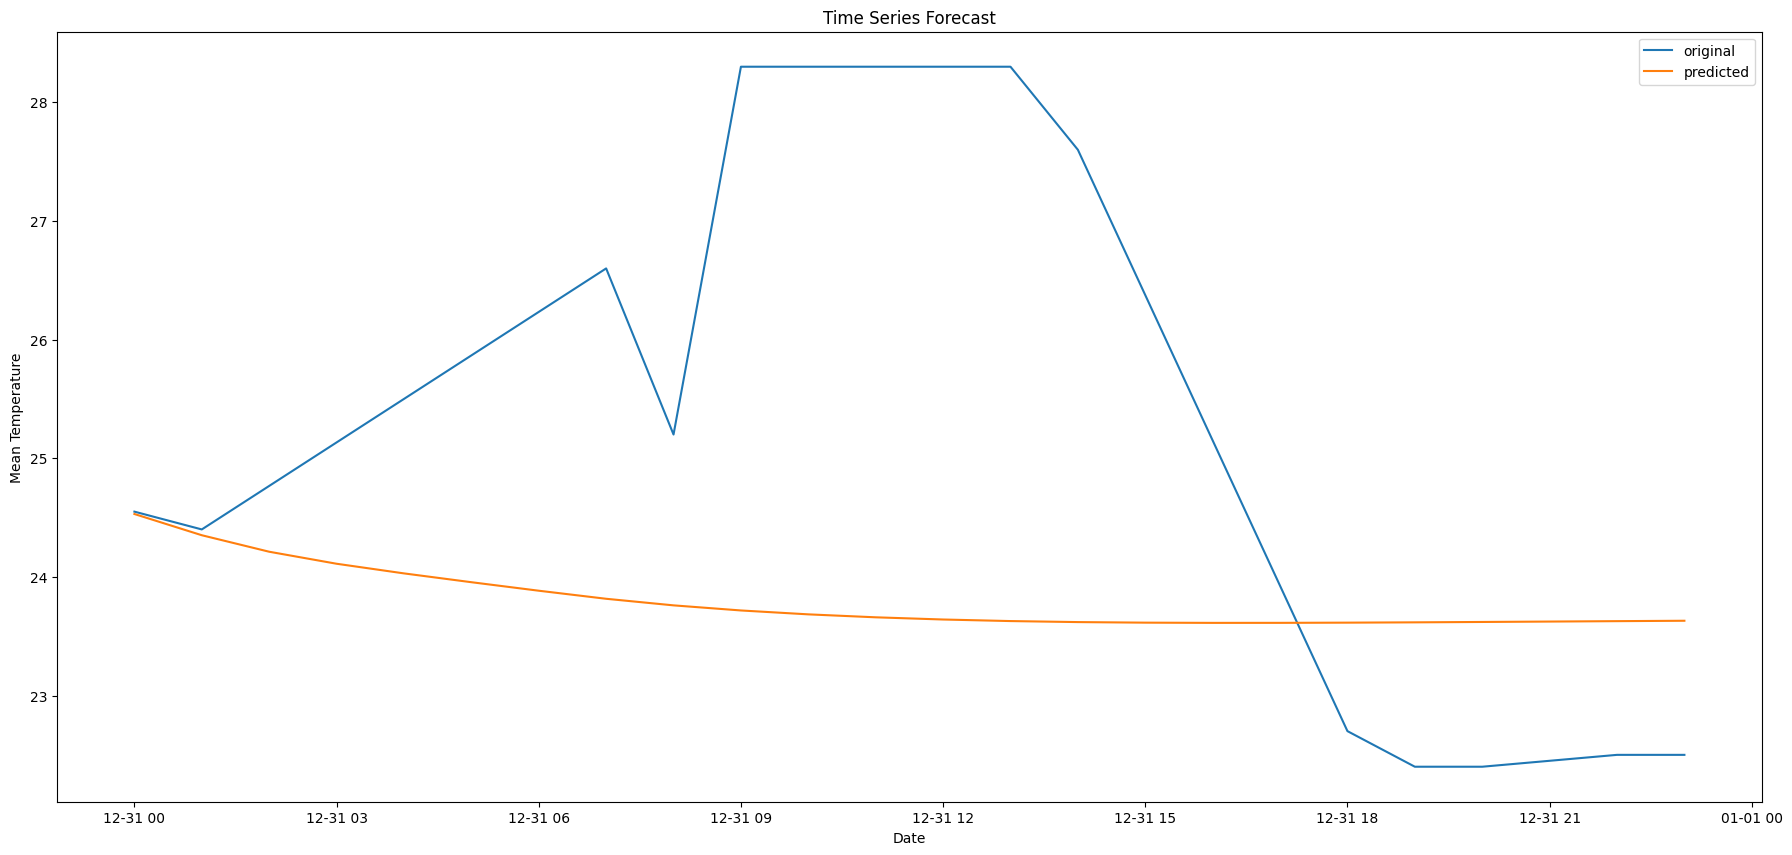

C:\Users\Thomas\AppData\Local\Temp\ipykernel_12652\2911446552.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = forecast


MEAN SQUARED ERROR:  6.815244558779008
RH --------------------------------------------------------------------------------
Test statistic:  -2.634020294624958
p-value:  0.08616781287135045
Critical Values: {'1%': -3.431234234988236, '5%': -2.8619307641319858, '10%': -2.5669779994183854}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=58491.397, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37770.470, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=50715.568, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=77776.057, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=37754.137, Time=0.60 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=37715.586, Time=0.91 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=37664.486, Time=1.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=37608.598, Time=1.60 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=37581.100, Time=2.32 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=37554.852, Time=2.91 sec

In [3]:
for building, df in samples.groupby('building_id'):
    print(building, '='*80)
    for typeId in value_type_ids:
        df_val = df[['date', typeId]]
        df_val = df_val.sort_values(by='date')
        dates = df_val['date']
        df_val = df_val.set_index('date')

        df_train = df_val[:-24]
        df_test = df_val[-24:]
        print(reading_types.at[int(typeId) - 1, 'reading_type_name'], '-'*80)
        try: 
            result = adfuller(df_val)
            print('Test statistic: ' , result[0])
            print('p-value: '  ,result[1])
            print('Critical Values:' ,result[4])
        except: 
            print("CONSATANT FOR: ", reading_types.at[int(typeId) - 1, 'reading_type_name'])

        # lag_acf = acf(df_val , nlags = 20)
        # lag_pacf = pacf(df_val , nlags = 20, method = 'ols')

        # plt.figure(figsize=(22,10))

        # plt.subplot(121) 
        # plt.plot(lag_acf)
        # plt.axhline(y=0,linestyle='--',color='gray')
        # plt.axhline(y=-1.96/np.sqrt(len(df_val)),linestyle='--',color='gray')
        # plt.axhline(y=1.96/np.sqrt(len(df_val)),linestyle='--',color='gray')
        # plt.title('Autocorrelation Function')

        # # PACF
        # plt.subplot(122)
        # plt.plot(lag_pacf)
        # plt.axhline(y=0,linestyle='--',color='gray')
        # plt.axhline(y=-1.96/np.sqrt(len(df_val)),linestyle='--',color='gray')
        # plt.axhline(y=1.96/np.sqrt(len(df_val)),linestyle='--',color='gray')
        # plt.title('Partial Autocorrelation Function')
        # plt.tight_layout()


        #model creation
        # model = ARIMA(df_train, order = (1, 0, 1))
        # model_fit = model.fit()

        # #prediction 
        # start_index = datetime(2023, 8, 1)
        # end_index = datetime(2023, 12, 31) 
        # forecast = model_fit.predict(start = start_index, end = end_index)

        arima = pm.auto_arima(df_train, start_p = 0, d = 0, start_q = 0, \
                              max_p = 20, max_d = 5, max_q = 5, \
                                  start_P = 0, D = 0, start_Q = 0, \
                                    max_P = 20, max_D = 5, max_Q = 5, m = 1,\
                                    error_action = 'warn', trace = True, surpress_warnings = True, stepwise = True, random_state = 20, n_fits = 50
                                )
    
        print(arima.summary())
        forecast = arima.predict(n_periods = 24, index = df_test.index)
        forecast.index = df_test.index
        
        # print(forecast)
        # print(df_test.index)

        #accuracy 
        df_test['predicted'] = forecast
        print("MEAN SQUARED ERROR: ", mean_squared_error(df_test[typeId], df_test['predicted']))

        
        #visualization
        plt.figure(figsize=(22,10))
        plt.plot(df_test,label = "original")
        plt.plot(forecast,label = "predicted")
        plt.title("Time Series Forecast")
        plt.xlabel("Date")
        plt.ylabel("Mean Temperature")
        plt.legend()
        plt.show()
    
    break